## Assignment - Statistics for Data Science with Python

### Load Dataset

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

In [19]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)


In [22]:
boston_df.describe()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [15]:
boston_df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


### Become familiar with the dataset
The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [15]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [13]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [ ]:
boston_df

### Generate Descriptive Statistics and Visualizations
#### Question 1: For the 'Median value of owner-occupied homes' provide a boxplot

Evalution : This question carries 10 marks

Text(0, 0.5, 'Median Value of Owner-Occupied Homes ($1000s)')

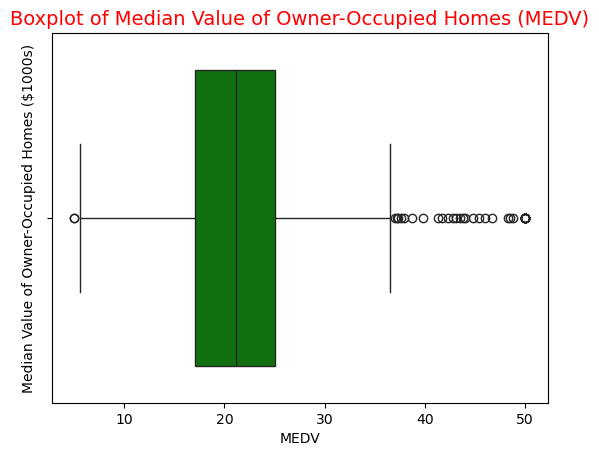

In [66]:
# Solution goes here:

sns.boxplot(x=boston_df['MEDV'],color='green')
plt.title("Boxplot of Median Value of Owner-Occupied Homes (MEDV)" ,color='red',fontsize=14)
plt.ylabel("Median Value of Owner-Occupied Homes ($1000s)")



#### Question 2: Provide a histogram for the Charles River variable

Evalution : This question carries 20 marks

Text(0, 0.5, 'Count ')

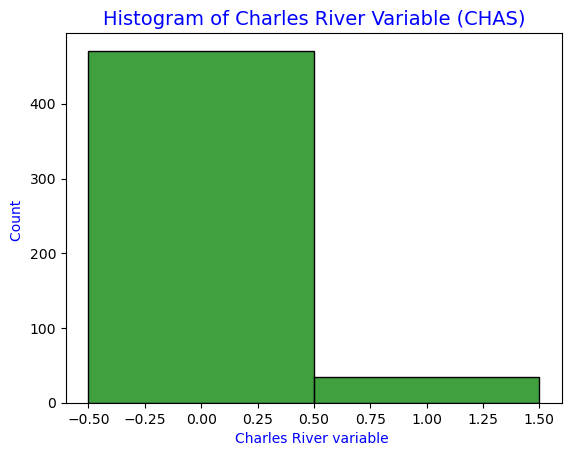

In [63]:
# Solution goes here:

sns.histplot(boston_df['CHAS'], discrete=True, kde=False,color='green')
plt.title('Histogram of Charles River Variable (CHAS)', color='blue',fontsize=14)
plt.xlabel('Charles River variable ' ,color='blue')
plt.ylabel('Count ',color='blue')



#### Question 3: Provide a boxplot for the MEDV variable vs the AGE variable - Discretize the age variable into three groups of 35 years and younger, between 35 and 50 years and older

Evalution : This question carries 20 marks

Text(0, 0.5, 'Median Value of Owner-Occupied Homes (MEDV)')

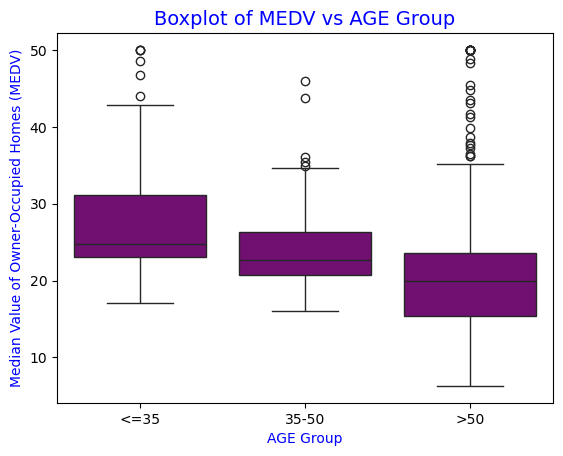

In [57]:
# Solution goes here:

bins = [0, 35, 50, 100]
labels = ['<=35', '35-50', '>50']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

sns.boxplot(x='AGE_group', y='MEDV', data=boston_df ,color='purple')
plt.title('Boxplot of MEDV vs AGE Group' ,color='Blue', fontsize=14)
plt.xlabel('AGE Group',color='Blue')
plt.ylabel('Median Value of Owner-Occupied Homes (MEDV)',color='Blue')



#### Question 4: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Evalution : This question carries 20 marks

Text(0, 0.5, 'Nitric Oxides Concentration (NOX)')

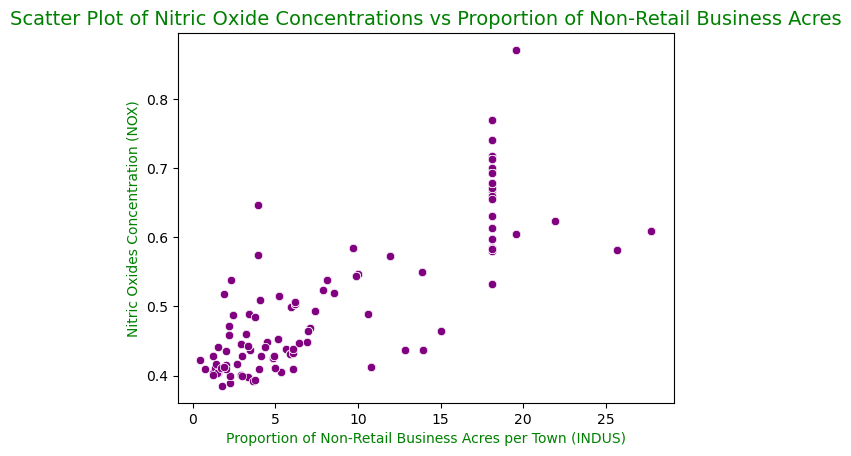

In [52]:
# Solution goes here:


sns.scatterplot(x='INDUS', y='NOX', data=boston_df,color='purple' )
plt.title('Scatter Plot of Nitric Oxide Concentrations vs Proportion of Non-Retail Business Acres',color='green',fontsize=14)
plt.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)',color='green' )
plt.ylabel('Nitric Oxides Concentration (NOX)',color='green' )


#### Question 5: Create a histogram for the pupil to teacher ratio variable.

Evalution : This question carries 20 marks

Text(0, 0.5, 'Count')

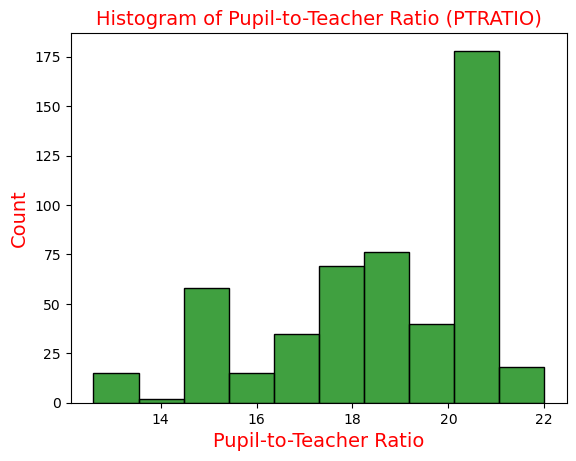

In [54]:
# Solution goes here:

sns.histplot(boston_df['PTRATIO'], bins=10, kde=False,color='green')
plt.title('Histogram of Pupil-to-Teacher Ratio (PTRATIO)', color='red', fontsize=14)
plt.xlabel('Pupil-to-Teacher Ratio' , color='red')
plt.ylabel('Count' , color='red' )





#### Question 6: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Evalution : This question carries 10 marks

In [33]:
# Solution goes here:
correlation = boston_df['NOX'].corr(boston_df['INDUS'])

print(f'Pearson correlation coefficient between NOX and INDUS: {correlation}')




Pearson correlation coefficient between NOX and INDUS: 0.7636514469209147
